In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
case_study = pd.read_csv('C:/Users/Swetha B Singh/Downloads/Salary Prediction/Original_Salary_Data.csv',header=0)

In [3]:
case_study.head()

,Sl_No,Age,Education_Level,Years_of_Experience,Salary
0,1,32,Bachelor's,5.0,90000
1,2,28,Master's,3.0,65000
2,3,45,PhD,15.0,150000
3,4,36,Bachelor's,7.0,60000
4,5,52,Master's,20.0,200000


### Converting categorical data to numerical data

In [4]:
case_study['Education_Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_en=LabelEncoder()

In [7]:
label_en.fit_transform(case_study['Education_Level'])

array([0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,

In [8]:
case_study['Education_Level_Label']=label_en.fit_transform(case_study['Education_Level'])

In [9]:
case_study['Education_Level_Label'].value_counts()

Education_Level_Label
0    224
1     98
2     51
Name: count, dtype: int64

In [10]:
case_study['Education_Level'].value_counts()

Education_Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [11]:
print(case_study.keys())

Index(['Sl_No', 'Age', 'Education_Level', 'Years_of_Experience', 'Salary',
       'Education_Level_Label'],
      dtype='object')


### Visualization Graphs

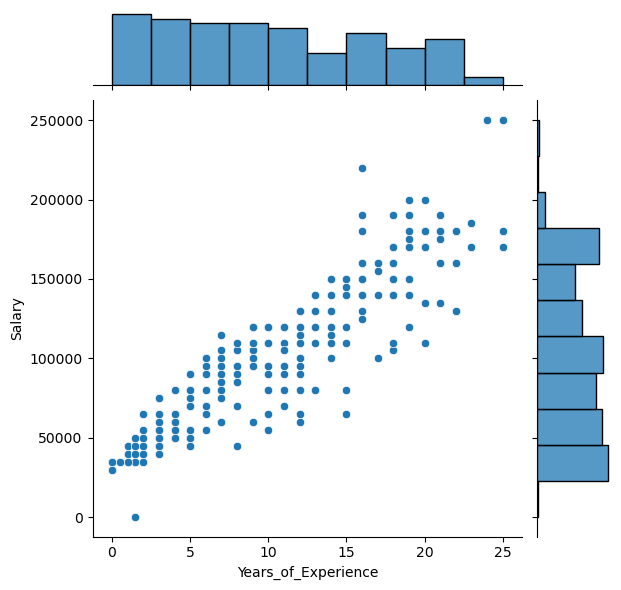

In [12]:
sns.jointplot(x=("Years_of_Experience"),y="Salary",data=case_study)

In [13]:
case_study.head()

,Sl_No,Age,Education_Level,Years_of_Experience,Salary,Education_Level_Label
0,1,32,Bachelor's,5.0,90000,0
1,2,28,Master's,3.0,65000,1
2,3,45,PhD,15.0,150000,2
3,4,36,Bachelor's,7.0,60000,0
4,5,52,Master's,20.0,200000,1


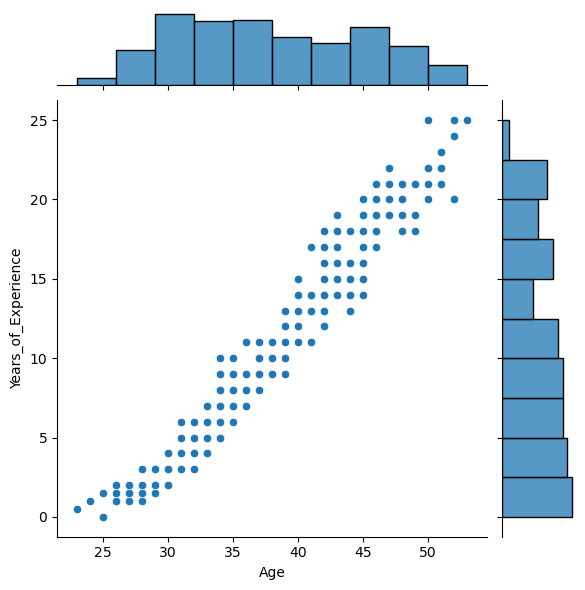

In [14]:
sns.jointplot(x=("Age"),y="Years_of_Experience",data=case_study)

C:\Users\Swetha B Singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


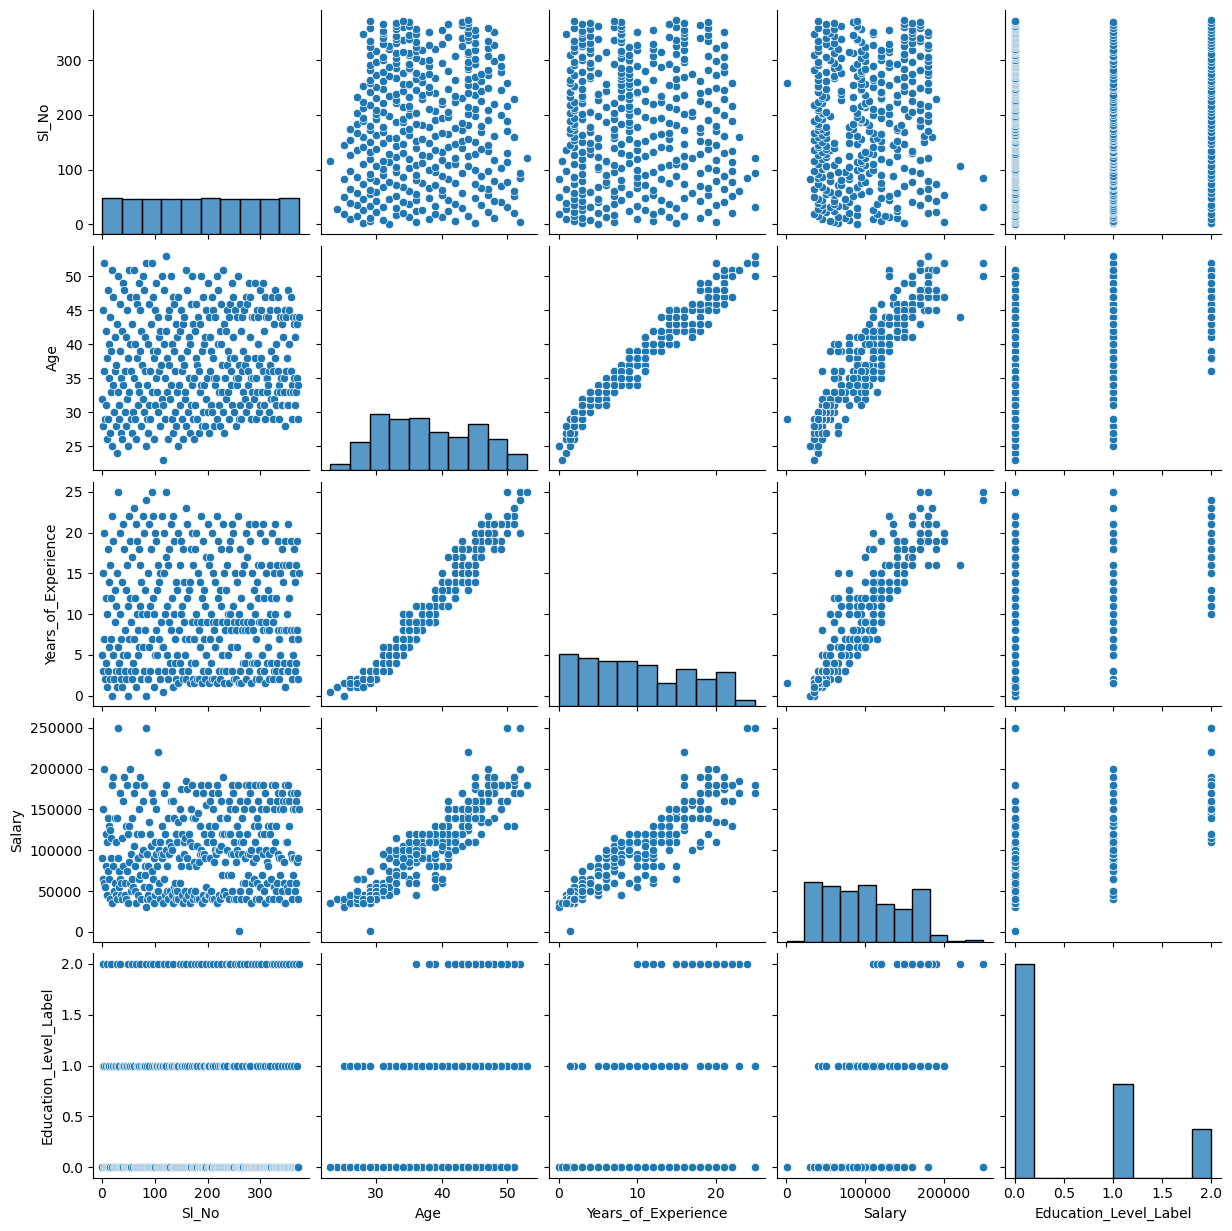

In [15]:
sns.pairplot(case_study)

## Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

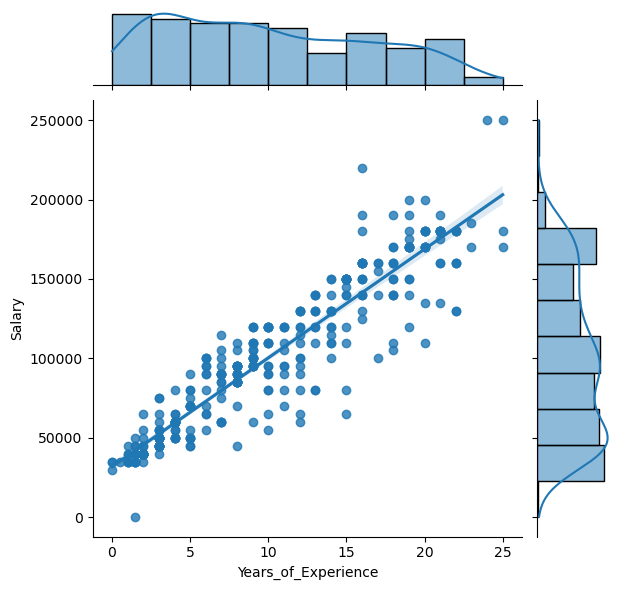

In [17]:
sns.jointplot(x = case_study['Years_of_Experience'], y= case_study['Salary'], data=case_study, kind="reg")

In [18]:
print(case_study.keys())

Index(['Sl_No', 'Age', 'Education_Level', 'Years_of_Experience', 'Salary',
       'Education_Level_Label'],
      dtype='object')


In [19]:
x=case_study.drop("Salary",axis=1)
x.head()

,Sl_No,Age,Education_Level,Years_of_Experience,Education_Level_Label
0,1,32,Bachelor's,5.0,0
1,2,28,Master's,3.0,1
2,3,45,PhD,15.0,2
3,4,36,Bachelor's,7.0,0
4,5,52,Master's,20.0,1


In [20]:
y=case_study['Salary']
y.head()

0     90000
1     65000
2    150000
3     60000
4    200000
Name: Salary, dtype: int64

### Splitting Train and Test Dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 5) (75, 5) (298,) (75,)


In [24]:
simplelr = LinearRegression()

In [25]:
simplelr.fit(x_train,y_train)

ValueError: could not convert string to float: "Bachelor's"

In [ ]:
y_pred = simplelr.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
print(simplelr.intercept_)

## r2_score

In [26]:
from sklearn.metrics import r2_score 

In [27]:
lm_a=LinearRegression()

In [28]:
lm_a.fit(x_train,y_train)

ValueError: could not convert string to float: "Bachelor's"

In [ ]:
y_test_a=lm_a.predict(x_test)

In [ ]:
y_train_a=lm_a.predict(x_train)

In [ ]:
y_test_a

In [ ]:
y_train_a

In [ ]:
r2_score(y_train,y_train_a)

In [ ]:
r2_score(y_test,y_test_a)

In [ ]:
pip install matplotlib

In [ ]:
import matpoltlib.pyplot as plt